## Module 3: Statistical Inference for Linear Regression

### Step 0

Load the appropriate libraries and bring in the data. Note that we have to run a script to get the [California Housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) to match as it is in scikit-learn. We cannot pull it directly from scikit-learn since CodeGrade cannot access the internet.

In [1]:
# CodeGrade step0

from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import os
import tarfile
import joblib # Import joblib directly
from sklearn.datasets._base import _pkl_filepath, get_data_home
import statsmodels.api as sm


archive_path = "cal_housing.tgz" # change the path if it's not in the current directory
data_home = get_data_home(data_home=None) # change data_home if you are not using ~/scikit_learn_data
if not os.path.exists(data_home):
    os.makedirs(data_home)
filepath = _pkl_filepath(data_home, 'cal_housing.pkz')

with tarfile.open(mode="r:gz", name=archive_path) as f:
    cal_housing = np.loadtxt(
        f.extractfile('CaliforniaHousing/cal_housing.data'),
        delimiter=',')
    # Columns are not in the same order compared to the previous
    # URL resource on lib.stat.cmu.edu
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    joblib.dump(cal_housing, filepath, compress=6) # Now using the directly imported joblib

# Load the dataset
california = fetch_california_housing(as_frame=True)
data = california.data
target = california.target

In [2]:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [3]:
target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

### Step 1

*   Create a copy of the data and call it `df`
*   Select the `X` variable to be `MedInc` and the `y` be `MedianHouseValue`
*   Add the constant term and call it `X_const`

Verify this by returning the shape of `X_const`

In [5]:
# CodeGrade step1
df = data.copy()

X = df[['MedInc']]
y = target
X_const = sm.add_constant(X)

### Step 2

*   fit the OLS model and call it `model`

Then return the rounded model $r^2$ value to four decimal places.

In [6]:
# CodeGrade step2
model = sm.OLS(y, X_const).fit()

Print the model summary

In [7]:
# Display the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Mon, 16 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:02:29   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4509      0.013     34.082      0.0

### Step 3

Extract the slope and the related statistics for `MedInc`, calling them, respetively, `slope`, `std_error`, `t_statistic`, and `p_value`.

Return the following (do not round) to verify: `slope, std_error, t_statistic, p_value`.


In [11]:
# CodeGrade step3
slope = model.params['MedInc']
std_error = model.bse['MedInc']
t_statistic = model.tvalues['MedInc']
p_value = model.pvalues['MedInc']

print(f"Slope (b1): {slope}")
print(f"Standard Error: {std_error}")
print(f"t-Statistic: {t_statistic}")
print(f"p-Value: {p_value}")

Slope (b1): 0.4179384920189624
Standard Error: 0.0030680575388678357
t-Statistic: 136.2225077998989
p-Value: 0.0


### Step 4

Calculuate the confidence interval of `MedInc` at a 95% level of confidence, and call this `conf_int`.

Return the confidence interval rounded to four decimals places.

In [13]:
# CodeGrade step4
conf_int = model.conf_int(alpha=0.05).loc['MedInc']
print(f"95% Confidence Interval for the slope: [{conf_int[0]:.4f}, {conf_int[1]:.4f}]")

95% Confidence Interval for the slope: [0.4119, 0.4240]


### Step 5

Find the model predictions, call them `y_pred`.

Return `y_pred.shape` to verify.

In [15]:
# CodeGrade step5
y_pred = model.predict(X_const)
y_pred.shape

(20640,)

Plot the scatterplot with the regression line.

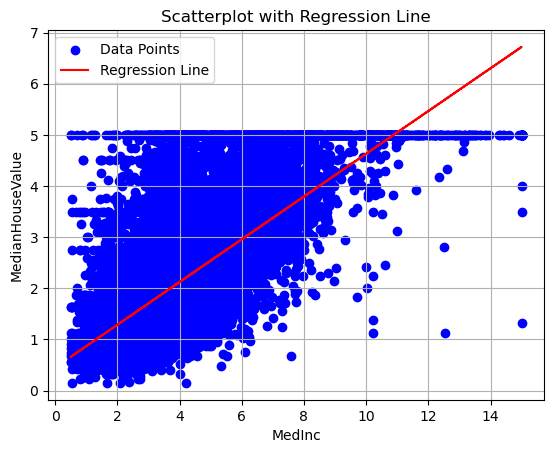

In [16]:
# Plot the scatterplot with regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Scatterplot with Regression Line')
plt.xlabel('MedInc')
plt.ylabel('MedianHouseValue')
plt.legend()
plt.grid(True)
plt.show()